<a href="https://colab.research.google.com/github/benjaminBoboul/FashionConvNet/blob/master/FashionTrainingInception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup directory

cloning and merging directories together.

In [1]:
!git clone https://github.com/aryapei/In-shop-Clothes-From-Deepfashion.git
!rsync -a ./In-shop-Clothes-From-Deepfashion/Img/MEN/ ./In-shop-Clothes-From-Deepfashion/Img/WOMEN/

Cloning into 'In-shop-Clothes-From-Deepfashion'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 30676 (delta 0), reused 3 (delta 0), pack-reused 30672
Receiving objects: 100% (30676/30676), 397.23 MiB | 36.02 MiB/s, done.
Resolving deltas: 100% (16/16), done.
Checking out files: 100% (26451/26451), done.


# Define Neural Network

Create a ConvNet instance and remove last layer to implement transfert learning.

:warning: do not forget to freeze pretrained model reduce training workload.

In [47]:
#!/usr/bin/env python3

""" Low Cost Transfert Learning on CIBR with Inceptionv3 ConvNet
Description:
============
see this script as a disappointment to me.
Was hoping to correctly use ~~~InceptionV3~~~ VGG16 model by freezing the layers and fitting data generator to train this ConvNet.
The current script collect extracted features from ~~~InceptionV3~~~ VGG16 and names to write Hierarchical Data Format file.
Required setup:
===============
$ git clone https://github.com/aryapei/In-shop-Clothes-From-Deepfashion.git
$ rsync -a ./In-shop-Clothes-From-Deepfashion/Img/MEN/ ./In-shop-Clothes-From-Deepfashion/Img/WOMEN/
Thoses commands clone and merge current Fashion dataset hosted at https://github.com/aryapei/In-shop-Clothes-From-Deepfashion in the same folder ./In-shop-Clothes-From-Deepfashion/Img/WOMEN/
"""

import numpy as np
from numpy import linalg as LA
import os
import h5py
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.preprocessing  import image
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob

img_side_size = 299

class ConvNet:
    def __init__(self):
        self.model = InceptionResNetV2(input_shape=(img_side_size, img_side_size, 3), weights="imagenet", include_top=False, pooling="max")
        self.model.predict(np.zeros((1, img_side_size, img_side_size, 3)))

    '''
    Use inceptionv3 model to extract features
    Output normalized feature vector
    '''
    def extract_feat(self, img_path):
        img = image.load_img(img_path, target_size=(img_side_size,img_side_size))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)
        feat = self.model.predict(img)
        norm_feat = feat[0]/LA.norm(feat[0])
        return norm_feat

if __name__ == "__main__":

    img_dir = "/content/In-shop-Clothes-From-Deepfashion/Img/WOMEN"
    img_pattern = f"{img_dir}/**/**/*.jpg"
    print(img_pattern)
    img_list = glob(img_pattern)
    
    print(f"{' feature extraction starts ':=^120}")
    
    feats = []
    names = []

    model = ConvNet()
    img_list_len = len(img_list)
    for i, img_path in enumerate(img_list):
        norm_feat = model.extract_feat(img_path)
        feats.append(norm_feat)
        img_name = '/'.join(img_path.split('/')[-5:])
        names.append(img_name)
        print(f"({i}/{img_list_len}) feat extraction of {img_name}.")

    feats = np.array(feats)
    names = np.string_(names)
    
    print(f"{' writing feature extraction results ':=^120}")
    h5f = h5py.File("featureCNN.h5", 'w')
    h5f.create_dataset('dataset_feat', data=feats)
    h5f.create_dataset('dataset_name', data=names)
    h5f.close()

Streaming output truncated to the last 5000 lines.
(21432/26430) feat extraction of Img/WOMEN/Jackets_Coats/id_00001140/02_1_front.jpg.
(21433/26430) feat extraction of Img/WOMEN/Jackets_Coats/id_00000593/04_7_additional.jpg.
(21434/26430) feat extraction of Img/WOMEN/Jackets_Coats/id_00000593/04_4_full.jpg.
(21435/26430) feat extraction of Img/WOMEN/Jackets_Coats/id_00000593/04_1_front.jpg.
(21436/26430) feat extraction of Img/WOMEN/Jackets_Coats/id_00000593/04_3_back.jpg.
(21437/26430) feat extraction of Img/WOMEN/Jackets_Coats/id_00000593/04_2_side.jpg.
(21438/26430) feat extraction of Img/WOMEN/Jackets_Coats/id_00000181/03_7_additional.jpg.
(21439/26430) feat extraction of Img/WOMEN/Jackets_Coats/id_00000181/03_3_back.jpg.
(21440/26430) feat extraction of Img/WOMEN/Jackets_Coats/id_00000181/03_1_front.jpg.
(21441/26430) feat extraction of Img/WOMEN/Jackets_Coats/id_00002440/03_7_additional.jpg.
(21442/26430) feat extraction of Img/WOMEN/Jackets_Coats/id_00002440/03_3_back.jpg.
(214

=================================================== searching starts ===================================================
top 10 images in order are:  ['/content/In-shop-Clothes-From-Deepfashion/Img/WOMEN/Sweaters/id_00000062/01_1_front.jpg', '/content/In-shop-Clothes-From-Deepfashion/Img/WOMEN/Jackets_Coats/id_00003844/01_7_additional.jpg', '/content/In-shop-Clothes-From-Deepfashion/Img/WOMEN/Jackets_Coats/id_00001053/02_2_side.jpg', '/content/In-shop-Clothes-From-Deepfashion/Img/WOMEN/Dresses/id_00001323/02_7_additional.jpg', '/content/In-shop-Clothes-From-Deepfashion/Img/WOMEN/Sweaters/id_00000062/01_2_side.jpg', '/content/In-shop-Clothes-From-Deepfashion/Img/WOMEN/Cardigans/id_00001967/02_7_additional.jpg', '/content/In-shop-Clothes-From-Deepfashion/Img/WOMEN/Dresses/id_00000825/01_7_additional.jpg', '/content/In-shop-Clothes-From-Deepfashion/Img/WOMEN/Cardigans/id_00006965/02_2_side.jpg', '/content/In-shop-Clothes-From-Deepfashion/Img/WOMEN/Sweaters/id_00000062/02_7_additional.jpg'

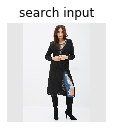

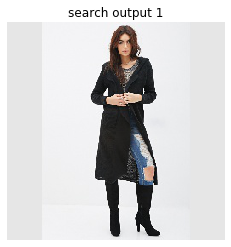

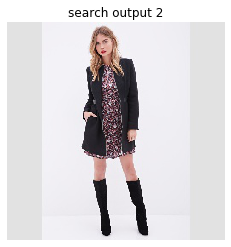

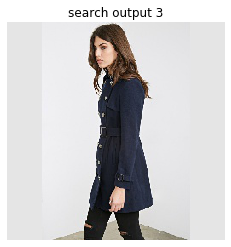

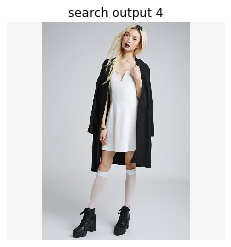

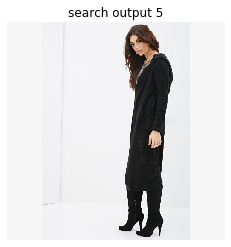

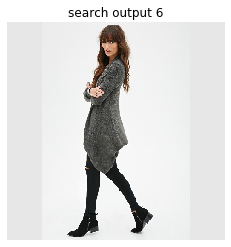

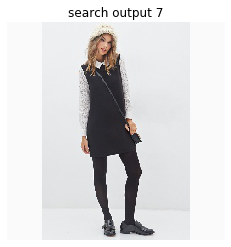

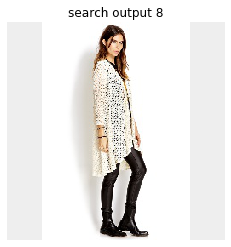

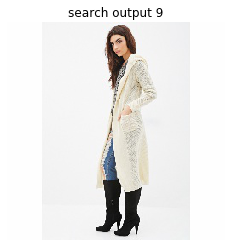

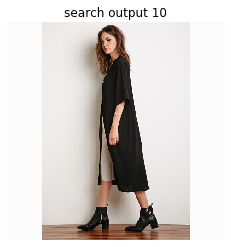

In [48]:
import numpy as np
from numpy import linalg as LA
import os
import h5py
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.preprocessing  import image
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob

img_side_size = 299

class ConvNet:
    def __init__(self):
        self.model = InceptionResNetV2(input_shape=(img_side_size, img_side_size, 3), weights="imagenet", include_top=False, pooling="max")
        self.model.predict(np.zeros((1, img_side_size, img_side_size, 3)))

    '''
    Use inceptionv3 model to extract features
    Output normalized feature vector
    '''
    def extract_feat(self, img_path):
        img = image.load_img(img_path, target_size=(img_side_size,img_side_size))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)
        feat = self.model.predict(img)
        norm_feat = feat[0]/LA.norm(feat[0])
        return norm_feat

# Read the produced files :
    
h5f = h5py.File('./featureCNN.h5', 'r')
feats = h5f['dataset_feat'][:]
imgNames = h5f['dataset_name'][:]
h5f.close()

print(f"{' searching starts ':=^120}")
queryDir = '/content/In-shop-Clothes-From-Deepfashion/Img/WOMEN/Sweaters/id_00000062/01_1_front.jpg'
queryImg = mpimg.imread(queryDir)

plt.figure()
plt.subplot(2, 1, 1)
plt.imshow(queryImg)
plt.title("Query Image")
plt.axis('off')

model = ConvNet()
queryVec = model.extract_feat(queryDir)
scores = np.dot(queryVec, feats.T)
rank_ID = np.argsort(scores)[::-1]
rank_score = scores[rank_ID]

# number of top retrieved images to show
maxres = 10
local = "/content/In-shop-Clothes-From-Deepfashion/"
distant = "https://raw.githubusercontent.com/aryapei/In-shop-Clothes-From-Deepfashion/master/"
imlist = [f"{local}{imgNames[index].decode('utf-8')}" for i,index in enumerate(rank_ID[0:maxres])]
print("top %d images in order are: " % maxres, imlist)

plt.imshow(queryImg)
plt.title("search input")
plt.axis('off')
plt.show()

for i, im in enumerate(imlist):
  image = mpimg.imread(im)
  plt.imshow(image)
  plt.title("search output %d" % (i + 1))
  plt.axis('off')
  plt.show()